# Exercise 1 - Getting Started

## Objectives
- To become familiar with Python and Jupyter Notebooks
- To be able to generate discrete signals in Python 
- To calculate the energy/power of a signal in Python

## Instructions
- At the start of each exercise, run all code before you begin. In the toolbar above, click Cell > Run All


In [2]:
def binseq(n):
    if n==1:
        seq = [0,1]
    else:
        seq = []
        parents = binseq(n-1)
        for parent in parents:
            seq.append(2*parent)
        for parent in parents:
            seq.append(2*parent + 1)
            
    return seq

In [3]:
binseq(4)

[0, 8, 4, 12, 2, 10, 6, 14, 1, 9, 5, 13, 3, 11, 7, 15]

In [1]:
import os
os.makedirs('results/ex1', exist_ok=True)

## Lab Exercise

### Sinusoidal Signals
A continuous-time sinusoid is given by $x(t)=A\sin(2\pi f t +\phi)=A\sin(\omega t +\phi)$, where $A$ is the amplitude, $t$ is time in seconds, $f$ is the frequency in Hertz (or $\omega$ in radians), and $\phi$ is the initial phase in radians. 

Because Python is a numerical computing tool, we can plot functions numerically over a defined range of values. Now let us create a plot of a sine wave with a frequency, $f$, of 1 KHz using $N=128$ data points for $0\leq t<5$ ms. 

---

**Question 1.1** Before plotting, calculate the expected number of cycles of sine wave.

To check your answer, let us now plot the sine wave. In Python you can create a vector, `t`, with 128 elements by running code in the following cell:

>**Answer 1.1** There should be 5 sine waves observable for 0 $\le$ t $\lt$ 5
>
>The sine wave has $T = \frac{1}{1000}$ while the time scale is $\frac{1}{200}$ hence it is simple to find that $\frac{1000}{200} = 5$

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from functions.lab_functions import plot_signal

# define  constants
fsig = 1000
Nsamp = 128
t = np.linspace(0,0.005,Nsamp,endpoint=False)

>**GTA Tip**
>
>In Python:
>- You do not need to declare variables like in C++
>- Anything between <code>#</code> and newline is a comment
>- The result of a statement can be printed with the <code>print()</code> command
>- There are several ways in Python you can use to create a vector. The first way is used above: <code>linspace(start,end,no_of_points,endpoint)</code> endpoint is a flag to indicate if the endpoint should be included in the vector.
>- Another way uses the <code>np.arange(start, end, increment)</code> command and <code>increment=1</code> by default. Therefore, <code>np.arange(0, 5)</code> will create a row vector containing five elements  vector $x=[0\: 1\: 2\: 3\: 4]$.
>- Check out the documentation: https://numpy.org/doc/stable/reference/

Sometimes, it can be useful to check the dimension(s) of matrices. This can be done using the `np.shape(x)` command which will report the dimension(s) of `x` as row by column. Let us now check the dimension(s) of `t`:

In [3]:
print('Dimension(s) of t:')
print(np.shape(t))
print('\n') # \n creates a newline
print('t:')
print(np.round(t,3))

Dimension(s) of t:
(128,)


t:
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.003 0.003 0.003 0.003 0.003 0.003 0.003
 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003
 0.003 0.003 0.003 0.003 0.003 0.003 0.004 0.004 0.004 0.004 0.004 0.004
 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004
 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005]


To create the sine wave $x(t)=\sin(2\pi f t)$, simply execute the next cell.

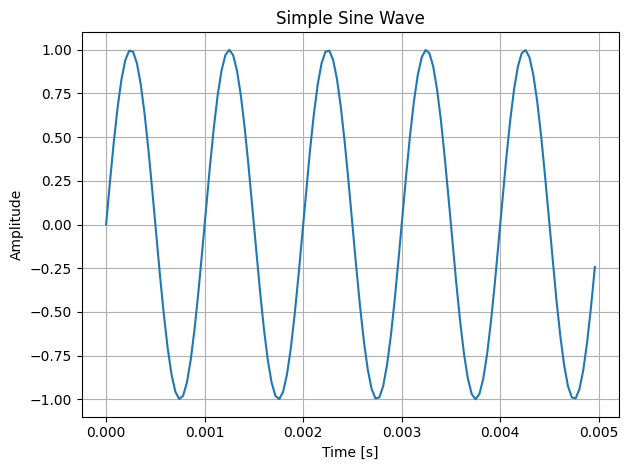

In [4]:
x = np.sin(2*np.pi*fsig*t);

plt = plot_signal(t, x, title='Simple Sine Wave', xlabel='Time [s]', ylabel='Amplitude')
plt.show()

>**GTA Tip**
>
>Check that $x$ and $t$ have the same dimensions. Python performs 'broadcasting' so that algorithms can be written more efficiently (see https://numpy.org/doc/stable/user/basics.broadcasting.html).

Since plotting signals will be used many times in this coursework, you have been provided with a plotting function, `plot_signal()`, in the `lab_functions.py` file. To use the function, we need to first import:

```python
from functions.lab_functions import plot_signal
```

To save the plots we have created, we can use the `plt.savefig('title')` command. For example:

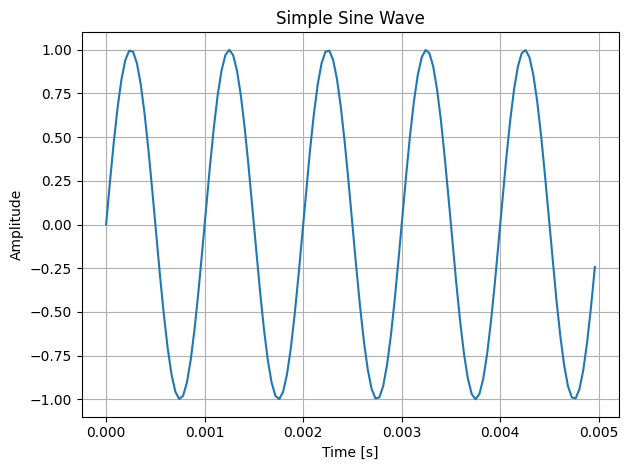

In [5]:
x = np.sin(2*np.pi*fsig*t);

plt = plot_signal(t, x, title='Simple Sine Wave', xlabel='Time [s]', ylabel='Amplitude')
plt.savefig('results/ex1/ex1_simple_sine_save.pdf')
plt.show()

The plot created above, `ex1_simple_sine_save.pdf`, will have also been saved to the `/results/ex1/` folder so you now have a record of the plot.

>**GTA Tip**
>
>You can also plot the sine wave using cross markers for each discrete point by entering the command `plot_signal(t, x, marker='x')` and change the colour of the line to red with `plot_signal(t, x, color='red')`.  Please see an example below.



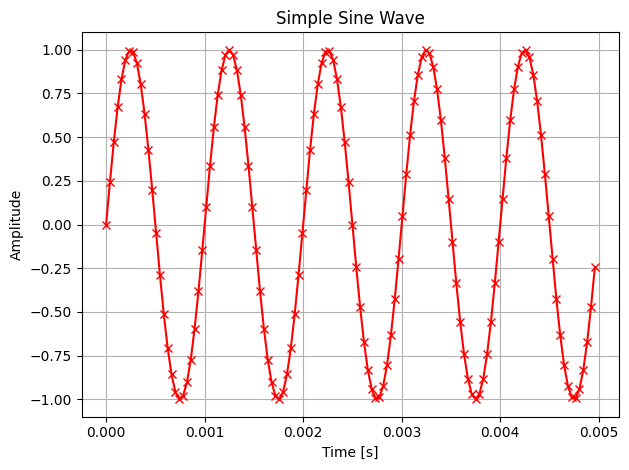

In [6]:
x = np.sin(2*np.pi*fsig*t);

plt = plot_signal(t, x, marker='x', color='red', title='Simple Sine Wave', xlabel='Time [s]', ylabel='Amplitude')
plt.show()

### Sampled Sine Wave

Consider a discrete-time sine wave: $x[n]=A\sin(\Omega n +\phi)$ obtained by sampling the continuous-time signal at a sampling rate of $f_s=1/T_s$, where $A$ is the amplitude, $\Omega$ is the normalised angular frequency and $\phi$ is the phase. This is mathematically represented by:

$$x[n]=x(t)|_{t=nT_s}=A\sin(\omega n T_s + \phi) = A \sin(\Omega n + \phi),$$

where $|_{t=nT_s}$ represents the evaluation of $t$ at discrete points $nT_s$ using the following definition.

---
**Definition:**
$$\Omega=\frac{\omega}{f_s} =2\pi\frac{f}{f_s}=2\pi F, \quad \text{where }F=\frac{f}{f_s} \text{ and } \omega = 2\pi f$$

It is common to use $f$ for 'real' frequencies and $\omega$ for 'real' angular frequencies. The scaled versions are $F$ for normalised frequency and $\Omega$ for normalised angular frequency. The unit of $\Omega$ is 'radians per sample' and $F$ is 'cycles per sample'.

---

Now let us create a plot of a sampled sine wave with a frequency, $f$, of 1 KHz and a sampling frequency, $f_s$, of 25.6 kHz, where $N=128$ implies that 128 data points should be generated. 

To create the sine wave  $x[n]=\sin(2\pi \frac{f}{f_s}n)$ , simply execute the next cell

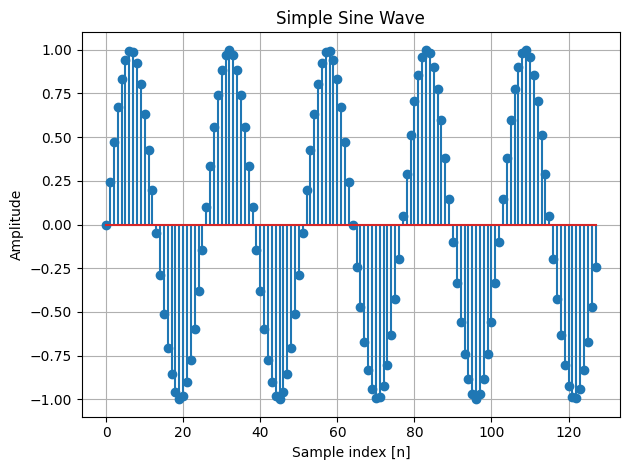

In [7]:
fs = 25600
n = t*fs
x = np.sin(2*np.pi*fsig/fs*n)

plt = plot_signal(n, x, title='Simple Sine Wave', xlabel='Sample index [n]', ylabel='Amplitude',func='stem')
plt.show()

The first 'Simple Sine Wave' figure is a plot of `x` against time `t`. After sampling, however, we obtain a plot of amplitude `x` against sample index `n`.

**Question 1.2** Can you explain the differences between `n` and `t`? What is the range of values of `n`?



>**Answer 1.2**  From the above code:
>
>```t = np.linspace(0,0.005,Nsamp,endpoint=False)``` which shows that `t` is the 128 discrete datapoints across the function domain of $0 \le t \lt 5ms$
>
>`n` is the sample index which has range $0 \le n \le 128$. It represents each discrete point through the time `t` in where the function is sampled.



**Question 1.3** For this sampled sine example, calculate $\omega$, and $\Omega$?


>**GTA Tip**
>
>The output here is plotted as discrete points using the command `plot_signal(n, x)`. You can change the properties of the plot such as marker colour and symbol using `markerfmt` and stem lines using `linefmt`. See an example below and documentation for more information 
(see https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.stem.html).


>**Answer 1.3** 
>
>From the definition:
>    $$\omega = 2\pi f$$
>    $$\Omega = \frac{\omega}{f_{s}}$$
>
>Using the values in this sampled sine function:
>    $$ \omega = 2\pi * 1000 = 6283 \; rads^{-1}$$
>    $$ \Omega = \frac{\omega}{25600} = 0.245 \;\text{rads/sample}$$

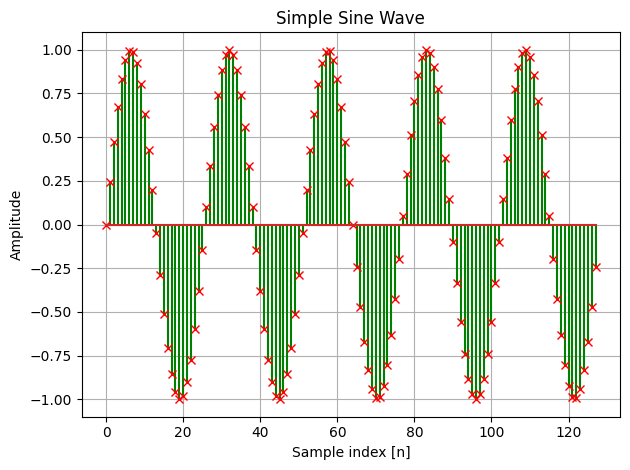

In [8]:
x = np.sin(2*np.pi*fsig/fs*n)

plt = plot_signal(n, x, markerfmt='rx', linefmt='g', title='Simple Sine Wave', xlabel='Sample index [n]', ylabel='Amplitude',func='stem')
plt.show()


Since sine waves are useful waveforms, let us write a function to generate them for any signal frequency, $f$, sampling frequency, $f_s$, and number of samples, $N$. In Python, functions are stored as in file(s) with extension '**.py**'. To make your life easier, we have written this function for you in the `lab_functions.py` file stored in the functions folder.

The `sinegen` function defined in the `lab_functions.py` file is given below:

```python
def sinegen(fs, fsig, Nsamp):
    tsamp = 1/fs
    t = np.arange(0, Nsamp*tsamp, tsamp)
    y = np.sin(2*np.pi*fsig*t)
    return t, y
```

**Question 1.4** In the `sinegen` function, how can you use `linspace` instead of `arange` to generate `t`?


To test `sinegen` function, we first need to import it:

```python
from functions.lab_functions import sinegen
```

We can then execute the code using:

```python
t, y = sinegen(fs, fsig, Nsamp)
```

We can now write some code to reproduce the previous plot but this time utilising the `sinegen` function:

>**Answer 1.4**
>
>In order to use the `linspace` function, use:
>```t = np.linspace(0, Nsamp*tsamp, Nsamp)```
>
>The key difference between `np.arange` and `np.linspace` is that `arange` takes in a step size argument while `linspace` takes in the number of samples to be generated.

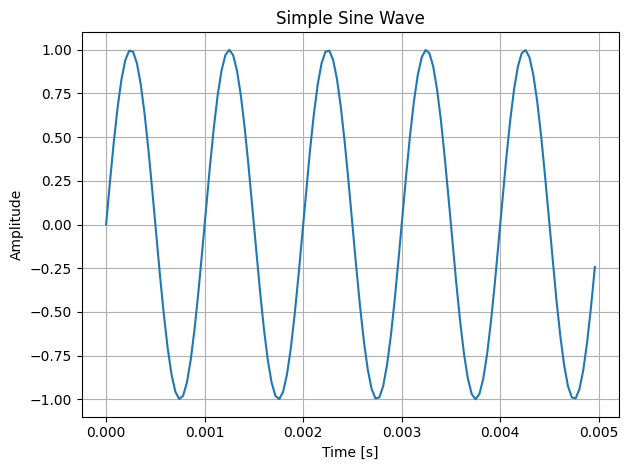

In [9]:
from functions.lab_functions import sinegen
t, y = sinegen(fs, fsig, Nsamp)

plt = plot_signal(t, y, title='Simple Sine Wave', xlabel='Time [s]', ylabel='Amplitude')
plt.show()

**Question 1.5** Create a `cosgen` function which generate a cosine wave for any frequency, $f$, sampling frequency, $f_s$, and number of samples, $N$.

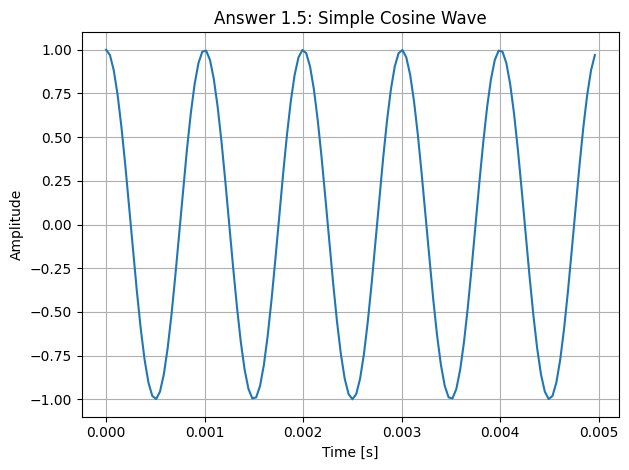

In [10]:
# add code here
from functions.lab_functions import cosgen
t, y = cosgen(fs, fsig, Nsamp)

plt = plot_signal(t, y, title='Answer 1.5: Simple Cosine Wave', xlabel='Time [s]', ylabel='Amplitude')
plt.show()

**Question 1.6** Use your `cosgen` function to plot 5 cycles of a cosine of amplitude 1 with normalised angular frequency $\Omega=\frac{\pi}{5}$ rads/sample.

>**Calculations**
>
>This question is open ended, it is **not** about using the previous cosine function parameters. Instead, any parameters can be used, with the only constraints being that $\Omega = \frac{\pi}{5}$, amplitude is 1 and the plot only consists of 5 cycles of cosine.
>
>To start with, the ratio $\frac{f}{f_s}$ can be found since $\Omega$ is known:
>$$\Omega = 2\pi\frac{f_{sig}}{f_s} = \frac{\pi}{5} \xleftrightarrow{} \frac{f_{sig}}{f_s} = \frac{1}{10}$$
>
>Following this, the sampling frequency, $f_s$ is related to the number of sampled, $N$ and the timescale, $t$ by:
>$$f_s = \frac{N_{samp}}{t}$$
>
>Finally, in order to output only 5 cosine cycles, the cycles can be calculated by:
>$$ cycles = f_{sig}*t = 5$$
>where $f_{sig}$ is the signal frequency and $t$ is timescale.
>
>As the `cosgen()` function has parameters `fs`, `fsig`, `Nsamp`, we can use the above relationships to assign values for each of the parameters to plot a function which obeys the conditions
>
>To start, we can use the same signal frequency, $f_{sig} = 1$ kHz and timescale, $t = 5$ ms to keep the number of cycles at 5.
>
>Next recall that the ratio between $f_{sig}$ and $f_s$ is $\frac{1}{10}$. Since we have $f_{sig} = 1000$, it is easy to see that $f_s = 10000$.
>
>Finally, with $f_s = 10000$ and $t = 0.005$, we can calculate that the number of samples, $N_{samp}$ will be $f_s * t = 50$.

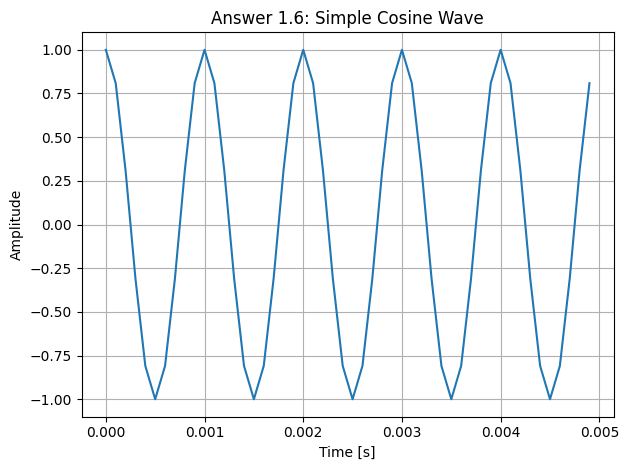

In [11]:
# add code here
from functions.lab_functions import cosgen
t, y = cosgen(10000, 1000, 50)

plt = plot_signal(t, y, title='Answer 1.6: Simple Cosine Wave', xlabel='Time [s]', ylabel='Amplitude')
plt.show()


>**NOTE:** The current values we have selected for this parameter result in a sharp edged cosine wave plot, and the 5th cycle is not fully described. This is **not** ideal. Instead, lets try again, and increase the number of samples.

### Power and energy of discete-time signals
In signal processing, it is often useful to calculate the energy or power of a signal. Remember from lectures that signals are energy signals **or** power signals; these are mutually exclusive quantities.

---
**Definition:**
For discrete-time signals with $N$ samples, $x[n]$, 

 $$E=\sum_{n=-\infty}^{\infty}x^2[n] \, \, \, \, \, \, \text{and} \, \, \, \, \, \, P=\lim_{N\rightarrow\infty}\frac{1}{N}\sum_{n=0}^{N-1}x^2[n]$$

**Question 1.7** Use python to calculate the energy or power of your cosine of amplitude 1 with angular frequency $\Omega=\frac{\pi}{5}$ rads/sample.
> **GTA Tip**
>
> In python: 
> - You can obtain the square of an array `x` using `x**2` or `np.square(x)`.
> - To sum all elements of `x`, use `sum(x)` or `np.sum(x)`.
> - You can use `len(x)` or `np.shape(x)` to find the number of elements in `x`.

In [12]:
# add code here
E = np.sum(np.square(x))
P = E/(np.shape(x))

**Question 1.8** Now calculate the energy/power of a cosine of amplitude 1 with angular frequency $\Omega=\pi$ rad/sample. Do you get the same result as before? 
> **GTA Tip**
>
> If you struggle to understand what is happening here, try plotting your cosine or printing out the amplitude of your samples. You can also repeat the exercise for a sine wave and see what changes.
> 
> This question is also found in Exercise 6 of Problem Sheet 1.

In [13]:
# add code here
